In [39]:
import pandas as pd

In [40]:
credit_data = pd.read_csv("german credit data unclean.csv")

In [41]:
credit_data[0:12]

,check_account_status,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,percent_disposable_income,gender_marriage,other_debtors,...,property,age,other_plans,housing,num_credits,job,dependents,telephone,foreign_worker,default
0,A11,6,A34,A43,1169.0,A65,A75,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,NaN,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055.0,A65,A73,2,A93,A101,...,A124,35.0,A143,A153,1,A172,2,A192,A201,0
6,A14,24,A32,A42,2835.0,A63,A75,3,A93,A101,...,A122,53.0,A143,A152,1,A173,1,A191,A201,0
7,A12,36,A32,A41,6948.0,A61,A73,2,A93,A101,...,A123,35.0,A143,A151,1,A174,1,A192,A201,0
8,A14,12,A32,A43,3059.0,A64,A74,2,A91,A101,...,A121,61.0,A143,A152,1,A172,1,A191,A201,0
9,A12,30,A34,A40,5234.0,A61,A71,4,A94,A101,...,A123,28.0,A143,A152,2,A174,1,A191,A201,1


# Step1: Clean and Tidy Data

## 1.1 Find missing data

In [42]:
print(credit_data.isnull().sum().sum())

25


In [43]:
print(credit_data.isnull().sum())

check_account_status          0
duration                      0
credit_history                0
purpose                       0
credit_amount                13
savings_account               0
employment_duration           0
percent_disposable_income     0
gender_marriage               0
other_debtors                 0
recident_since                0
property                      0
age                          12
other_plans                   0
housing                       0
num_credits                   0
job                           0
dependents                    0
telephone                     0
foreign_worker                0
default                       0
dtype: int64


<AxesSubplot:>

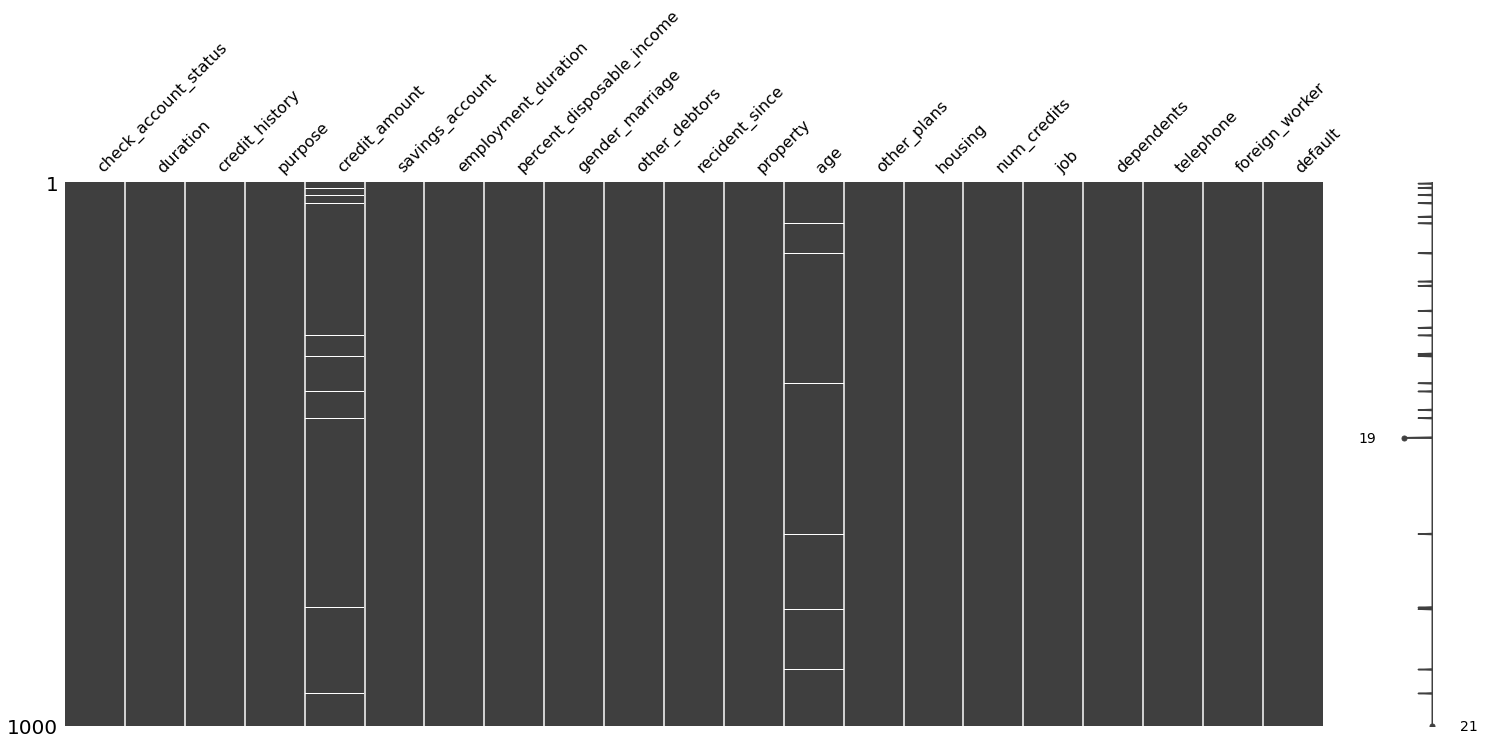

In [44]:
import missingno as msno
credit_data_some_columns = credit_data.iloc[:, 0:21:1]
msno.matrix(credit_data_some_columns)

<AxesSubplot:>

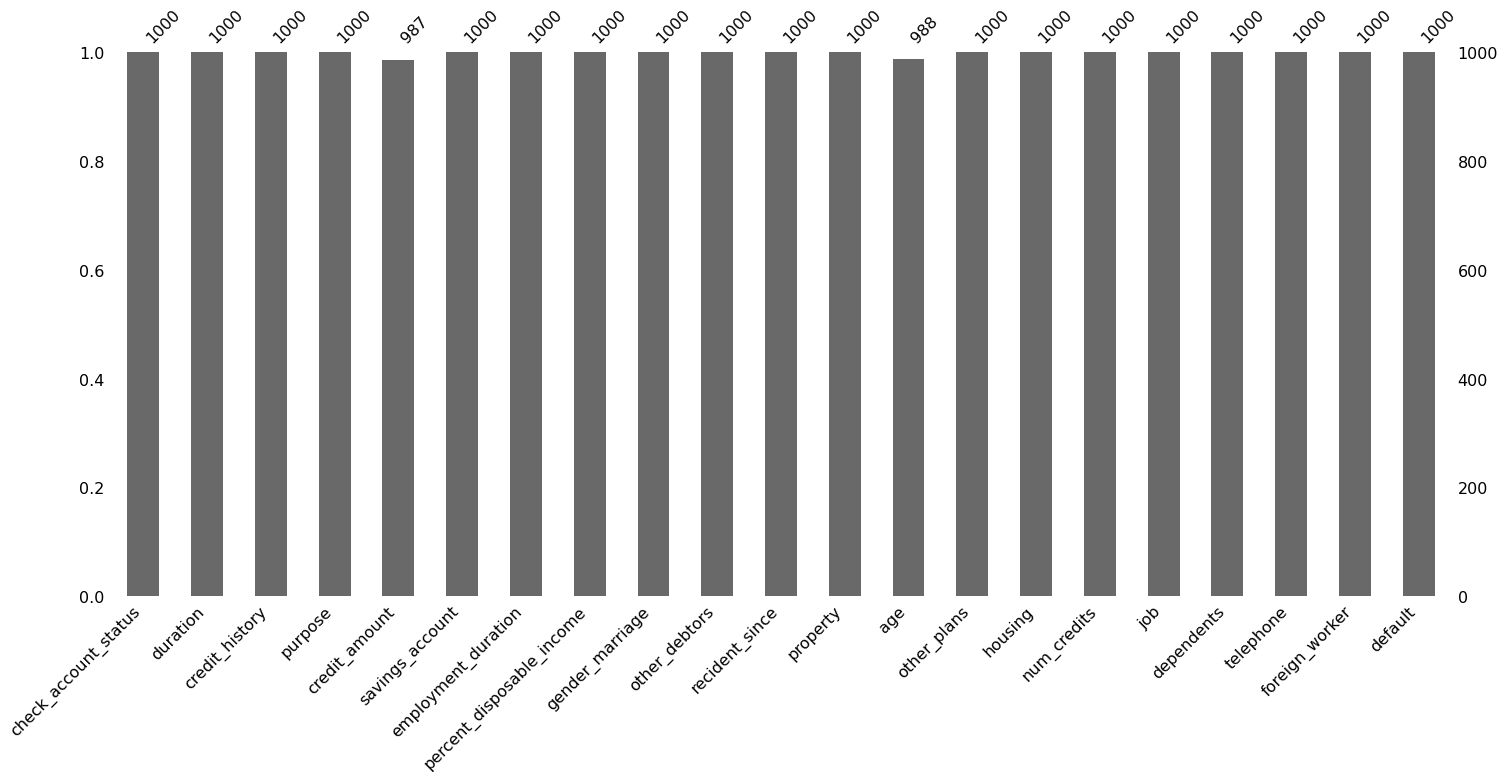

In [45]:
msno.bar(credit_data_some_columns)

## 1.2 Repair missing data

In [46]:
credit_data = credit_data.dropna(subset=['credit_amount'])

In [47]:
credit_data['age'].fillna(credit_data['age'].mean(), inplace=True)

In [48]:
credit_data[0:12]

,check_account_status,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,percent_disposable_income,gender_marriage,other_debtors,...,property,age,other_plans,housing,num_credits,job,dependents,telephone,foreign_worker,default
0,A11,6,A34,A43,1169.0,A65,A75,4,A93,A101,...,A121,67.000000,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22.000000,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49.000000,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,35.580943,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53.000000,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055.0,A65,A73,2,A93,A101,...,A124,35.000000,A143,A153,1,A172,2,A192,A201,0
6,A14,24,A32,A42,2835.0,A63,A75,3,A93,A101,...,A122,53.000000,A143,A152,1,A173,1,A191,A201,0
7,A12,36,A32,A41,6948.0,A61,A73,2,A93,A101,...,A123,35.000000,A143,A151,1,A174,1,A192,A201,0
8,A14,12,A32,A43,3059.0,A64,A74,2,A91,A101,...,A121,61.000000,A143,A152,1,A172,1,A191,A201,0
9,A12,30,A34,A40,5234.0,A61,A71,4,A94,A101,...,A123,28.000000,A143,A152,2,A174,1,A191,A201,1


## 1.3 Change all of the category data into numbers

In [49]:
one_hot_check_acc_stat = pd.get_dummies(credit_data['check_account_status'], prefix='ch_ac_st')
print(one_hot_check_acc_stat[0:5])

   ch_ac_st_A11  ch_ac_st_A12  ch_ac_st_A13  ch_ac_st_A14
0             1             0             0             0
1             0             1             0             0
2             0             0             0             1
3             1             0             0             0
4             1             0             0             0


In [50]:
credit_data.drop('check_account_status', axis=1, inplace=True)

In [51]:
credit_data = one_hot_check_acc_stat.join(credit_data)

In [52]:
credit_data[0:5]

,ch_ac_st_A11,ch_ac_st_A12,ch_ac_st_A13,ch_ac_st_A14,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,...,property,age,other_plans,housing,num_credits,job,dependents,telephone,foreign_worker,default
0,1,0,0,0,6,A34,A43,1169.0,A65,A75,...,A121,67.000000,A143,A152,2,A173,1,A192,A201,0
1,0,1,0,0,48,A32,A43,5951.0,A61,A73,...,A121,22.000000,A143,A152,1,A173,1,A191,A201,1
2,0,0,0,1,12,A34,A46,2096.0,A61,A74,...,A121,49.000000,A143,A152,1,A172,2,A191,A201,0
3,1,0,0,0,42,A32,A42,7882.0,A61,A74,...,A122,35.580943,A143,A153,1,A173,2,A191,A201,0
4,1,0,0,0,24,A33,A40,4870.0,A61,A73,...,A124,53.000000,A143,A153,2,A173,2,A191,A201,1


In [53]:
one_hot_credit_hist = pd.get_dummies(credit_data['credit_history'], prefix='cr_hist')
credit_data.drop('credit_history', axis=1, inplace=True)
credit_data = one_hot_credit_hist.join(credit_data)
credit_data[0:5]

,cr_hist_A30,cr_hist_A31,cr_hist_A32,cr_hist_A33,cr_hist_A34,ch_ac_st_A11,ch_ac_st_A12,ch_ac_st_A13,ch_ac_st_A14,duration,...,property,age,other_plans,housing,num_credits,job,dependents,telephone,foreign_worker,default
0,0,0,0,0,1,1,0,0,0,6,...,A121,67.000000,A143,A152,2,A173,1,A192,A201,0
1,0,0,1,0,0,0,1,0,0,48,...,A121,22.000000,A143,A152,1,A173,1,A191,A201,1
2,0,0,0,0,1,0,0,0,1,12,...,A121,49.000000,A143,A152,1,A172,2,A191,A201,0
3,0,0,1,0,0,1,0,0,0,42,...,A122,35.580943,A143,A153,1,A173,2,A191,A201,0
4,0,0,0,1,0,1,0,0,0,24,...,A124,53.000000,A143,A153,2,A173,2,A191,A201,1


In [54]:
column_name = 'purpose'
one_hot = pd.get_dummies(credit_data[column_name], prefix='purp')
credit_data.drop(column_name, axis=1, inplace=True)
credit_data = one_hot.join(credit_data)

In [55]:
column_name = 'savings_account'
one_hot = pd.get_dummies(credit_data[column_name], prefix='sav_acc')
credit_data.drop(column_name, axis=1, inplace=True)
credit_data = one_hot.join(credit_data)

In [56]:
column_name = 'employment_duration'
one_hot = pd.get_dummies(credit_data[column_name], prefix='emp_dur')
credit_data.drop(column_name, axis=1, inplace=True)
credit_data = one_hot.join(credit_data)

In [57]:
column_name = 'gender_marriage'
one_hot = pd.get_dummies(credit_data[column_name], prefix='gend_mar')
credit_data.drop(column_name, axis=1, inplace=True)
credit_data = one_hot.join(credit_data)

In [58]:
column_name = 'other_debtors'
one_hot = pd.get_dummies(credit_data[column_name], prefix='other_deb')
credit_data.drop(column_name, axis=1, inplace=True)
credit_data = one_hot.join(credit_data)

In [59]:
column_name = 'property'
one_hot = pd.get_dummies(credit_data[column_name], prefix='prop')
credit_data.drop(column_name, axis=1, inplace=True)
credit_data = one_hot.join(credit_data)

In [60]:
column_name = 'other_plans'
one_hot = pd.get_dummies(credit_data[column_name], prefix='plans')
credit_data.drop(column_name, axis=1, inplace=True)
credit_data = one_hot.join(credit_data)

In [61]:
column_name = 'housing'
one_hot = pd.get_dummies(credit_data[column_name], prefix='house')
credit_data.drop(column_name, axis=1, inplace=True)
credit_data = one_hot.join(credit_data)

In [62]:
column_name = 'job'
one_hot = pd.get_dummies(credit_data[column_name], prefix='job')
credit_data.drop(column_name, axis=1, inplace=True)
credit_data = one_hot.join(credit_data)

In [63]:
column_name = 'telephone'
one_hot = pd.get_dummies(credit_data[column_name], prefix='tel')
credit_data.drop(column_name, axis=1, inplace=True)
credit_data = one_hot.join(credit_data)

In [64]:
column_name = 'foreign_worker'
one_hot = pd.get_dummies(credit_data[column_name], prefix='fw')
credit_data.drop(column_name, axis=1, inplace=True)
credit_data = one_hot.join(credit_data)

In [65]:
credit_data[0:12]

,fw_A201,fw_A202,tel_A191,tel_A192,job_A171,job_A172,job_A173,job_A174,house_A151,house_A152,...,ch_ac_st_A13,ch_ac_st_A14,duration,credit_amount,percent_disposable_income,recident_since,age,num_credits,dependents,default
0,1,0,0,1,0,0,1,0,0,1,...,0,0,6,1169.0,4,4,67.000000,2,1,0
1,1,0,1,0,0,0,1,0,0,1,...,0,0,48,5951.0,2,2,22.000000,1,1,1
2,1,0,1,0,0,1,0,0,0,1,...,0,1,12,2096.0,2,3,49.000000,1,2,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,42,7882.0,2,4,35.580943,1,2,0
4,1,0,1,0,0,0,1,0,0,0,...,0,0,24,4870.0,3,4,53.000000,2,2,1
5,1,0,0,1,0,1,0,0,0,0,...,0,1,36,9055.0,2,4,35.000000,1,2,0
6,1,0,1,0,0,0,1,0,0,1,...,0,1,24,2835.0,3,4,53.000000,1,1,0
7,1,0,0,1,0,0,0,1,1,0,...,0,0,36,6948.0,2,2,35.000000,1,1,0
8,1,0,1,0,0,1,0,0,0,1,...,0,1,12,3059.0,2,4,61.000000,1,1,0
9,1,0,1,0,0,0,0,1,0,1,...,0,0,30,5234.0,4,2,28.000000,2,1,1


# Step2 Select the Algorithm

# Step3 Build the Model

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
X = credit_data.loc[:, 'fw_A201':'dependents']
Y = credit_data['default']

In [68]:
logModel = LogisticRegression(solver='liblinear')

In [69]:
logModel = logModel.fit(X,Y)

In [70]:
print(logModel.score(X,Y))

0.7831813576494427


# Step4 Check Model Quality

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [73]:
logModel = logModel.fit(X_train, y_train)

In [74]:
predictions = logModel.predict(X_test)

In [75]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [77]:
print(logModel.score(X_test, y_test))

0.7676767676767676


In [78]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[127  16]
 [ 30  25]]


# Step5 Build the model into an application

In [79]:
print(logModel.intercept_[0])
print(*logModel.coef_[0], sep='\n')

-0.5605935195670237
0.21657942680819
-0.777172946375222
-0.16265049167243648
-0.39794302789458874
-0.21733026305856587
-0.2078833053094461
-0.11009241367742773
-0.02528753752159573
0.08015459574365993
-0.3396140208236158
-0.30113409448705986
0.02116050261677915
0.03125298302440104
-0.6130070052082018
-0.36883081499976866
-0.12406924936585706
-0.3003639775071594
0.23267052230575175
-0.15907636344218673
0.3294236622368888
-0.7309408183617284
0.49827232775745656
-0.13220404208449366
-0.6275101031321841
-0.2991517021078094
0.07011642462269976
0.039394373425379194
0.08768701259031006
-0.5153245212087846
-0.24246680899663464
0.36989574817550014
0.09333422210830322
0.01563225421179788
-0.4047874265788765
-0.6346683174837552
0.5581659766405381
-1.096627009045692
-0.16879511529124339
-0.17642552528300787
-0.3609607535694766
0.0758749816600165
0.15477136839137254
0.7962708328007568
-0.1811335672821138
-0.1617347085881854
0.30904258104812204
0.3956533703018346
-0.03420551124388209
-0.353163620018

In [80]:
print(X_test[0:1].to_csv(index=False, sep='\n', header=False))

1
0
0
1
0
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
24
1553.0
3
2
23.0
2
1



In [81]:
print(logModel.predict_proba(X_test[0:1]))

[[0.6896199 0.3103801]]


In [82]:
import pickle
model_filename = 'germ_cred_model.pkl'
# Open the file to save as pkl file
the_file = open(model_filename, 'wb')
pickle.dump(logModel, the_file)
# Close the pickle instances
the_file.close()